In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, GRU, LSTM
from keras.optimizers import SGD

In [2]:
from keras.metrics import MeanSquaredError 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.optimizers import Adagrad
from keras.optimizers import Adam
from keras.optimizers import Nadam

In [3]:
data1=pd.read_csv('삼성전자주가(20220406-20240405).csv')
print('Number of rows and columns:', data1.shape)
data1["Datetime"] = pd.to_datetime(data1["Datetime"]).dt.strftime('%Y-%m-%d %H:%M:%S')
data1['Datetime'] = pd.to_datetime(data1['Datetime'])
data1.set_index('Datetime', inplace=True)
# data1.drop(columns = 'Unnamed: 0', inplace = True)
data1.head(5) # volume = 거래량

Number of rows and columns: (2960, 7)


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-04-06 09:00:00,68600.0,68800.0,68600.0,68700.0,68700.0,0
2022-04-06 10:00:00,68600.0,68800.0,68600.0,68700.0,68700.0,1846582
2022-04-06 11:00:00,68700.0,68700.0,68600.0,68600.0,68600.0,901392
2022-04-06 12:00:00,68700.0,68700.0,68500.0,68600.0,68600.0,2053045
2022-04-06 13:00:00,68600.0,68600.0,68500.0,68600.0,68600.0,924688


In [4]:
data2=pd.read_csv('모델 테스트.csv')
print('Number of rows and columns:', data2.shape)
data2["Datetime"] = pd.to_datetime(data2["Datetime"]).dt.strftime('%Y-%m-%d %H:%M:%S')
data2['Datetime'] = pd.to_datetime(data2['Datetime'])
data2.set_index('Datetime', inplace=True)
data2.drop(columns = 'Unnamed: 0', inplace = True)
data2.head(5) # volume = 거래량

Number of rows and columns: (2996, 8)


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-04-06 09:00:00,68600.0,68800.0,68600.0,68700.0,68700.0,0
2022-04-06 10:00:00,68600.0,68800.0,68600.0,68700.0,68700.0,1846582
2022-04-06 11:00:00,68700.0,68700.0,68600.0,68600.0,68600.0,901392
2022-04-06 12:00:00,68700.0,68700.0,68500.0,68600.0,68600.0,2053045
2022-04-06 13:00:00,68600.0,68600.0,68500.0,68600.0,68600.0,924688


In [5]:
data3=pd.read_csv('수익률 계산.csv')
print('Number of rows and columns:', data3.shape)
data3["Datetime"] = pd.to_datetime(data3["Datetime"]).dt.strftime('%Y-%m-%d %H:%M:%S')
data3['Datetime'] = pd.to_datetime(data3['Datetime'])
data3.set_index('Datetime', inplace=True)
#data1.drop(columns = 'Unnamed: 0', inplace = True)
data3.head(5) # volume = 거래량

Number of rows and columns: (1798, 7)


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-04-22 09:00:00,77400.0,77400.0,77200.0,77300.0,77300.0,0
2024-04-22 09:01:00,77300.0,77400.0,77100.0,77200.0,77200.0,337409
2024-04-22 09:02:00,77100.0,77200.0,77000.0,77100.0,77100.0,267021
2024-04-22 09:03:00,77000.0,77200.0,77000.0,77100.0,77100.0,218955
2024-04-22 09:04:00,77100.0,77100.0,76800.0,76800.0,76800.0,284661


In [6]:
all_data1=pd.read_csv('모델 테스트.csv')
print('Number of rows and columns:', all_data1.shape)
all_data1["Datetime"] = pd.to_datetime(all_data1["Datetime"]).dt.strftime('%Y-%m-%d %H:%M:%S')
all_data1['Datetime'] = pd.to_datetime(all_data1['Datetime'])
all_data1.set_index('Datetime', inplace=True)
all_data1.drop(columns = 'Unnamed: 0', inplace = True)
all_data1.head(5) # volume = 거래량

Number of rows and columns: (2996, 8)


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-04-06 09:00:00,68600.0,68800.0,68600.0,68700.0,68700.0,0
2022-04-06 10:00:00,68600.0,68800.0,68600.0,68700.0,68700.0,1846582
2022-04-06 11:00:00,68700.0,68700.0,68600.0,68600.0,68600.0,901392
2022-04-06 12:00:00,68700.0,68700.0,68500.0,68600.0,68600.0,2053045
2022-04-06 13:00:00,68600.0,68600.0,68500.0,68600.0,68600.0,924688


In [7]:
all_data1['change']=0
all_data1['target']=0
for i in range(len(all_data1)-1):
    all_data1.iloc[i+1,6]=all_data1.iloc[i+1,3]-all_data1.iloc[i,3]
all_data1.loc[all_data1['change']==0, 'target']=0
all_data1.loc[all_data1['change']<0, 'target']=-1
all_data1.loc[all_data1['change']>0, 'target']=1

In [8]:
all_data1

,Open,High,Low,Close,Adj Close,Volume,change,target
Datetime,,,,,,,,
2022-04-06 09:00:00,68600.0,68800.0,68600.0,68700.0,68700.0,0,0,0
2022-04-06 10:00:00,68600.0,68800.0,68600.0,68700.0,68700.0,1846582,0,0
2022-04-06 11:00:00,68700.0,68700.0,68600.0,68600.0,68600.0,901392,-100,-1
2022-04-06 12:00:00,68700.0,68700.0,68500.0,68600.0,68600.0,2053045,0,0
2022-04-06 13:00:00,68600.0,68600.0,68500.0,68600.0,68600.0,924688,0,0
...,...,...,...,...,...,...,...,...
2024-04-16 10:00:00,80300.0,80400.0,79700.0,79900.0,79900.0,6284883,-500,-1
2024-04-16 11:00:00,79800.0,80000.0,79400.0,79900.0,79900.0,4427816,0,0
2024-04-16 12:00:00,79900.0,80000.0,79600.0,79900.0,79900.0,2234167,0,0


In [9]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

features = all_data1[['Open', 'High', 'Low', 'change', 'Volume', 'Close']].values
sc = MinMaxScaler(feature_range=(0,1)) #Normalizer() #StandardScaler() RobustScaler()
data= sc.fit_transform(features)

# 데이터셋 생성
def create_dataset(data, seq_len):
    x_data, y_data = [], []
    for i in range(len(data) - seq_len):
        x_data.append(data[i:i + seq_len])
        y_data.append(data[i + seq_len,3])
    return np.array(x_data), np.array(y_data)

# 시퀀스 길이 (7일)
SEQ_LEN = 7

train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) - train_size - val_size)

# 시퀀스 생성을 고려한 인덱스
end_train = train_size - SEQ_LEN
end_val = train_size + val_size - SEQ_LEN

X_train, y_train = create_dataset(data[:train_size], SEQ_LEN)
X_val, y_val = create_dataset(data[train_size:train_size+val_size], SEQ_LEN)
X_test, y_test = create_dataset(data[train_size+val_size:], SEQ_LEN)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# DataLoader 설정
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=False)

val_data = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(dataset=val_data, batch_size=16, shuffle=False)

test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(dataset=test_data, batch_size=16, shuffle=False)

In [10]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob=0.2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out)
        out = self.fc(out[:, 3, :])
        return out

# 입력 차원
input_size = X_train_tensor.shape[2]
# 은닉 상태 크기
hidden_size = 256
# 출력 차원
output_size = 1

# 모델 생성
model = LSTMModel(input_size, hidden_size, output_size)
print(model)
'''def RMSELoss(y_pred, y_true):
    return torch.sqrt(torch.mean((y_pred - y_true) ** 2))'''

# 옵티마이저 정의 (Adam)
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# 손실 함수 설정
criterion = nn.MSELoss()

# 학습 파라미터 설정
num_epochs = 100
train_losses = []
val_losses = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
min_delta = 0.00001  # 개선으로 간주되기 위한 최소 변화량
best_loss = np.inf  # 가장 낮은 검증 손실을 추적dd
last_val_loss = np.inf
patience_counter = 0  # 개선되지 않는 에포크를 세는 카운터
# 모델 학습
for epoch in range(num_epochs):
    model.train()  # 학습 모드로 설정
    train_loss = 0.0
    
    for inputs, labels in train_loader:
        # 입력 데이터와 레이블을 GPU로 이동
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 기울기 초기화
        optimizer.zero_grad()
        
        # 순방향 전파
        outputs = model(inputs)
        
        # 손실 계산
        loss = criterion(outputs.squeeze(), labels)
        
        # 역전파 및 가중치 업데이트
        loss.backward()
        optimizer.step()
        
        # 손실 누적
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()  # 모델을 평가 모드로 설정
    val_loss = 0.0

    with torch.no_grad():
        model.eval()
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            val_loss += loss.item() * inputs.size(0)  # 누적 손실 계산
        # 에포크별 평균 검증 손실 계산
        val_loss /= len(val_loader.dataset)
        val_losses.append(val_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.5f}, Val Loss: {val_loss:.5f}')
    patience = 0
    if val_loss > best_loss + min_delta:
        patience += 1
        if patience == 25:
            print("Early stopping initiated.")
            print(f"Best Validation Loss: {best_loss:.5f}")
            break
    else:
        best_loss = val_loss
        patience = 0
        

    last_val_loss = val_loss  # 마지막 검증 손실 업데이트


# 테스트 데이터셋으로 평가
test_loss = 0.0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_loss += criterion(outputs, targets.unsqueeze(1)).item()

print(f'Test Loss (MSE): {test_loss/len(test_loader):.4f}')

LSTMModel(
  (lstm): LSTM(6, 256, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
)
Epoch 1/100, Train Loss: 0.05807, Val Loss: 0.00571
Epoch 2/100, Train Loss: 0.00676, Val Loss: 0.00545
Epoch 3/100, Train Loss: 0.00670, Val Loss: 0.00537
Epoch 4/100, Train Loss: 0.00644, Val Loss: 0.00528
Epoch 5/100, Train Loss: 0.00634, Val Loss: 0.00522
Epoch 6/100, Train Loss: 0.00614, Val Loss: 0.00520
Epoch 7/100, Train Loss: 0.00619, Val Loss: 0.00521
Epoch 8/100, Train Loss: 0.00615, Val Loss: 0.00525
Epoch 9/100, Train Loss: 0.00621, Val Loss: 0.00537
Epoch 10/100, Train Loss: 0.00613, Val Loss: 0.00540
Epoch 11/100, Train Loss: 0.00615, Val Loss: 0.00551
Epoch 12/100, Train Loss: 0.00617, Val Loss: 0.00581
Epoch 13/100, Train Loss: 0.00610, Val Loss: 0.00566
Epoch 14/100, Train Loss: 0.00621, Val Loss: 0.00604
Epoch 15/100, Train Loss: 0.00617, Val Loss: 0.00595
Epoch 16/100, Train Loss: 0.00620, Val Loss: 0.00600
Epoch

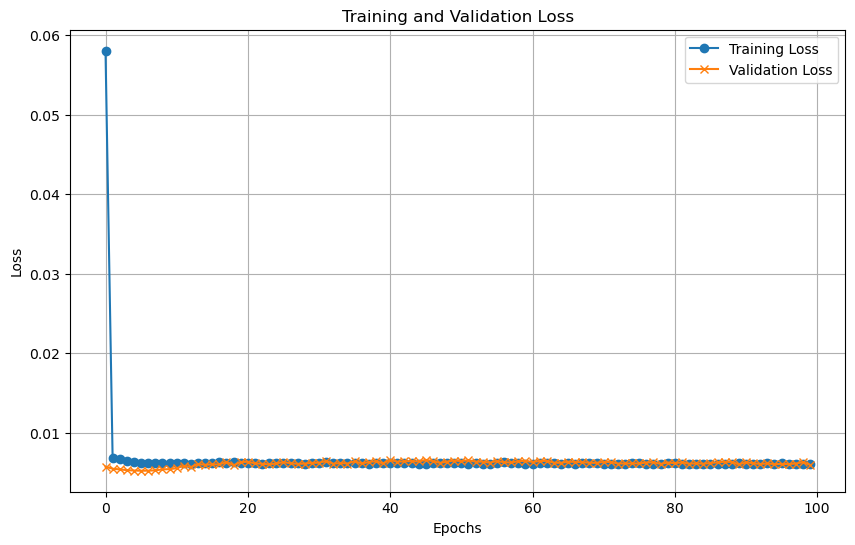

In [11]:
import matplotlib.pyplot as plt

# 위에 제시된 훈련 및 검증 과정 코드 실행 후 실행

# 훈련 손실과 검증 손실을 에포크별로 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(train_losses, label='Training Loss', marker='o')  # 훈련 손실 그래프
plt.plot(val_losses, label='Validation Loss', marker='x')  # 검증 손실 그래프
plt.title('Training and Validation Loss')  # 그래프 제목
plt.xlabel('Epochs')  # x축 라벨
plt.ylabel('Loss')  # y축 라벨
plt.legend()  # 범례 표시
plt.grid(True)  # 그리드 표시
plt.show()  # 그래프 보여주기

In [12]:
# 테스트 데이터셋에 대한 평가 및 결과 출력

model.eval()  # 모델을 평가 모드로 설정
test_losses = []  # 테스트 손실을 저장할 리스트
predictions = []  # 예측값을 저장할 리스트
actuals = []  # 실제값을 저장할 리스트

with torch.no_grad():  # 기울기 계산을 비활성화
    for seqs, labels in test_loader:

        outputs = model(seqs)

        # 손실 계산
        loss = criterion(outputs, labels)
        test_losses.append(loss.item())

        # 예측값과 실제값 저장
        predictions.extend(outputs.view(-1).detach().numpy())
        actuals.extend(labels.view(-1).detach().numpy())

# 평균 테스트 손실 계산 및 출력
average_test_loss = sum(test_losses) / len(test_losses)
print(f'Average Test Loss: {average_test_loss}')
predictions_temp = np.zeros((len(predictions), 6))  # 6는 특성의 총 개수입니다.
predictions_temp[:, 3] = predictions  # 종가 위치에 예측값 할당

actuals_temp = np.zeros((len(actuals), 6))  # 실제 데이터를 위한 동일한 접근 방식
actuals_temp[:, 3] = actuals  # 종가 위치에 실제값 할당

# 예측값과 실제값 출력 (처음 10개 샘플)
yest=np.delete(np.insert(sc.inverse_transform(X_test[:,-1,:])[:,-1], 0, 0), -1)
predictions_inverse = np.round(sc.inverse_transform(predictions_temp)[:,3], -2)+yest
actuals_inverse = np.round(sc.inverse_transform(actuals_temp)[:,3], -2)+yest

predictions_inverse = np.delete(predictions_inverse, 0)
actuals_inverse = np.delete(actuals_inverse, 0)


# 역정규화된 예측값과 실제값 출력 (처음 10개 샘플)
print("Predictions vs. Actuals (First 10 Samples, After Inverse Scaling):")
for i in range(10):
    print(f'Prediction: {predictions_inverse[i]:.4f}, Actual: {actuals_inverse[i]:.4f}')

Average Test Loss: 0.01253795969348989
Predictions vs. Actuals (First 10 Samples, After Inverse Scaling):
Prediction: 74600.0000, Actual: 74600.0000
Prediction: 74600.0000, Actual: 74900.0000
Prediction: 74400.0000, Actual: 74600.0000
Prediction: 74500.0000, Actual: 75000.0000
Prediction: 74500.0000, Actual: 73400.0000
Prediction: 74800.0000, Actual: 75200.0000
Prediction: 73500.0000, Actual: 73800.0000
Prediction: 73700.0000, Actual: 74000.0000
Prediction: 73800.0000, Actual: 73700.0000
Prediction: 73900.0000, Actual: 74500.0000


c:\Users\woora\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\woora\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


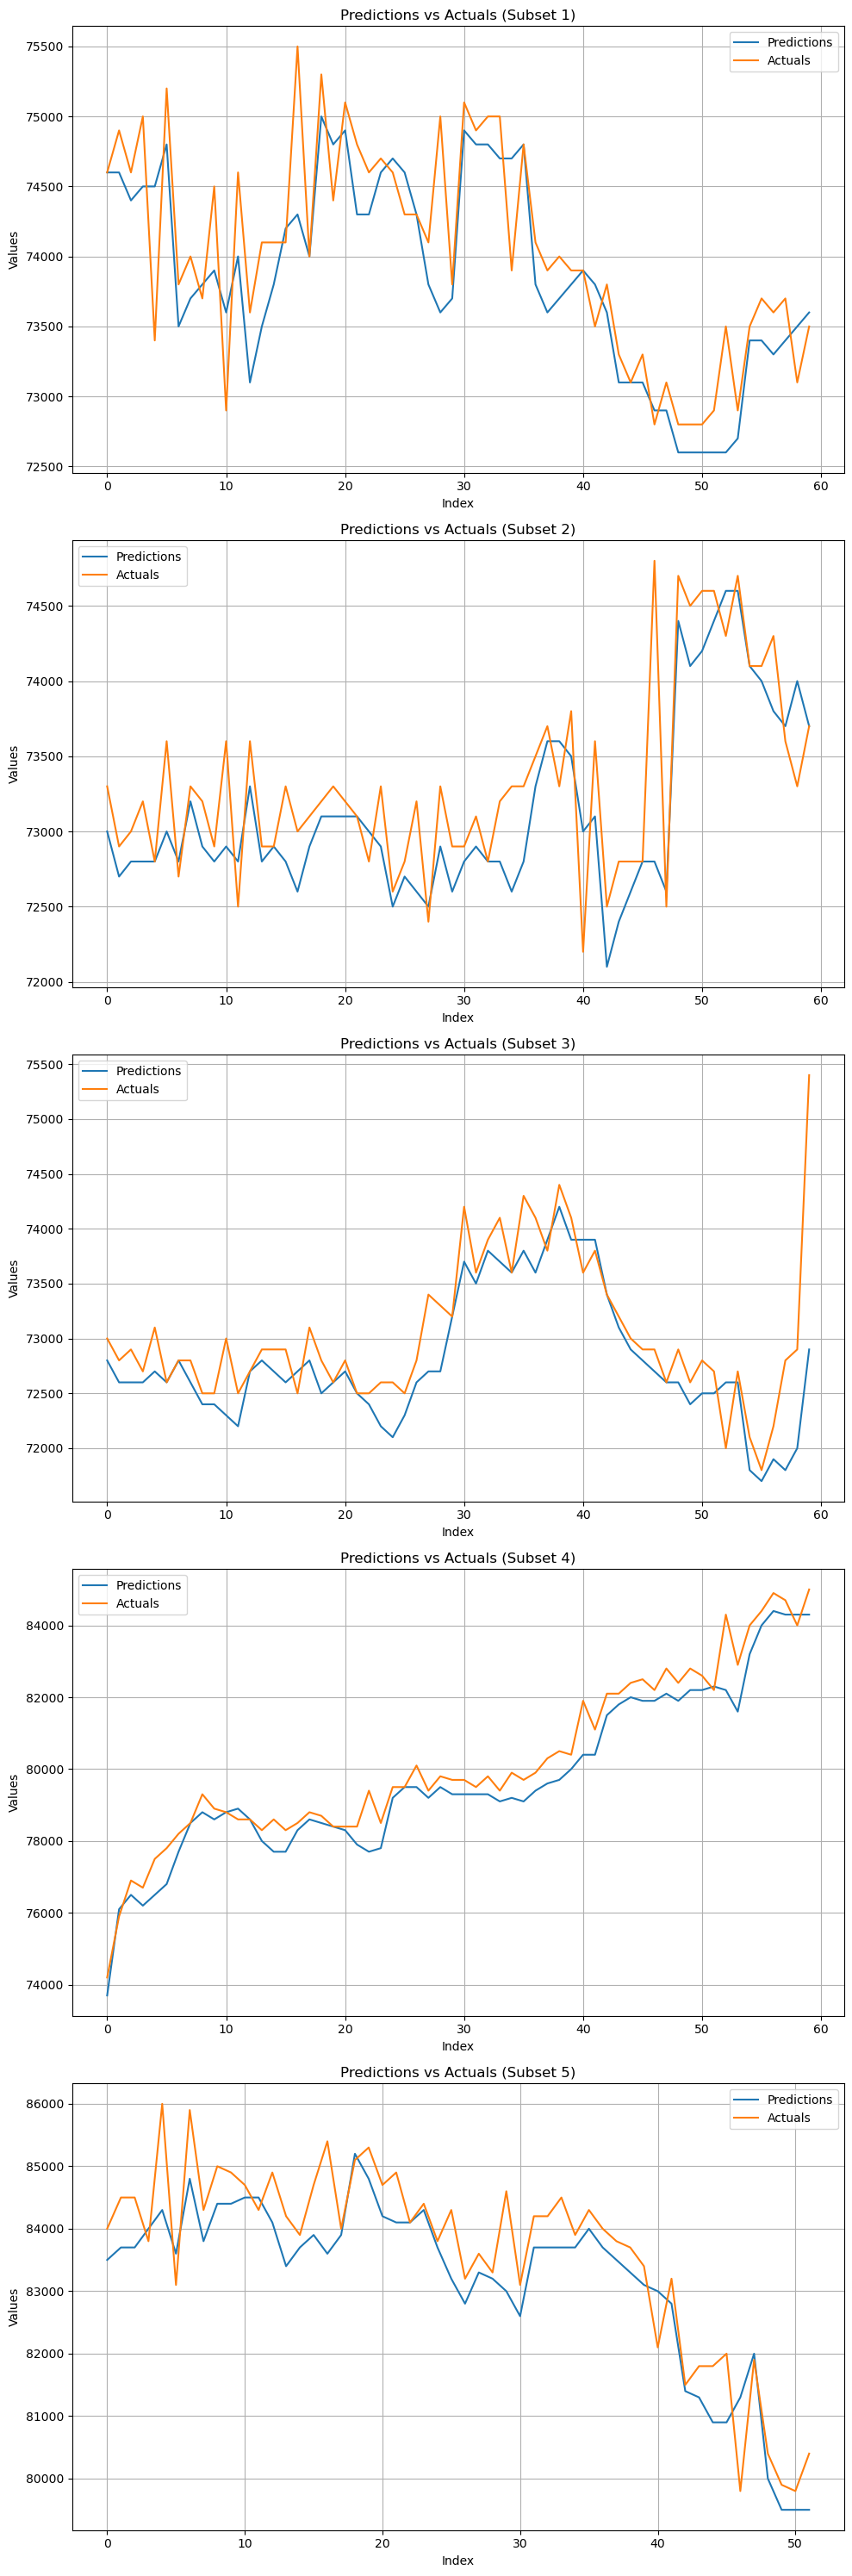

In [13]:
import matplotlib.pyplot as plt

# 전체 데이터를 4개로 나누기
n = 60
num_plots = len(predictions_inverse) // n
if len(predictions_inverse) % n != 0:
    num_plots += 1

# Plot 생성
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 6*num_plots))

for i in range(num_plots):
    start_index = i * n
    end_index = min((i + 1) * n, len(predictions_inverse))
    
    # Subplot 생성
    ax = axes[i] if num_plots > 1 else axes
    
    # 예측값과 실제값 그리기
    ax.plot(predictions_inverse[start_index:end_index], label='Predictions')
    ax.plot(actuals_inverse[start_index:end_index], label='Actuals')
    ax.set_title(f'Predictions vs Actuals (Subset {i+1})')
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# 수익률 계산 부분

# 이평선 부분 - 코드 수정, 적용

In [46]:
df_get=pd.read_csv('수익률 계산.csv')

In [47]:
print('Number of rows and columns:', df_get.shape)
df_get["Datetime"] = pd.to_datetime(df_get["Datetime"]).dt.strftime('%Y-%m-%d %H:%M:%S')
df_get['Datetime'] = pd.to_datetime(df_get['Datetime'])
df_get.set_index('Datetime', inplace=True)
#df_get.drop(columns = 'Unnamed: 0', inplace = True)

Number of rows and columns: (1798, 7)


In [48]:
df_get

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-04-22 09:00:00,77400.0,77400.0,77200.0,77300.0,77300.0,0
2024-04-22 09:01:00,77300.0,77400.0,77100.0,77200.0,77200.0,337409
2024-04-22 09:02:00,77100.0,77200.0,77000.0,77100.0,77100.0,267021
2024-04-22 09:03:00,77000.0,77200.0,77000.0,77100.0,77100.0,218955
2024-04-22 09:04:00,77100.0,77100.0,76800.0,76800.0,76800.0,284661
...,...,...,...,...,...,...
2024-04-26 14:54:00,76800.0,76800.0,76700.0,76700.0,76700.0,8382
2024-04-26 14:55:00,76800.0,76800.0,76700.0,76800.0,76800.0,15591
2024-04-26 14:57:00,76800.0,76800.0,76700.0,76800.0,76800.0,22806


In [49]:
df_get=pd.concat([df_get.iloc[:210], pd.DataFrame([df_get.iloc[210]]), df_get.iloc[210:]]).reset_index(drop=True)
df_get=pd.concat([df_get.iloc[:1795], pd.DataFrame([df_get.iloc[1795]]), df_get.iloc[1795:]]).reset_index(drop=True)

In [50]:
df_pred=df_get.iloc[::60,:]

In [51]:
stock_df=df_pred.copy()

In [52]:
stock_df['change']=0
stock_df['target']=0
for i in range(len(stock_df)-1):
    stock_df.iloc[i+1,6]=stock_df.iloc[i+1,3]-stock_df.iloc[i,3]
stock_df.loc[stock_df['change']==0, 'target']=0
stock_df.loc[stock_df['change']<0, 'target']=-1
stock_df.loc[stock_df['change']>0, 'target']=1

In [53]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

features = stock_df[['Open', 'High', 'Low', 'change', 'Volume', 'Close']].values
sc = MinMaxScaler(feature_range=(0,1)) #Normalizer() #StandardScaler() RobustScaler()
scaler_target = MinMaxScaler(feature_range=(0,1))

data= sc.fit_transform(features)

scaler_target.fit_transform(data[:,0].reshape(1,-1))
scaler_target.min_, scaler_target.scale_ = sc.min_[0], sc.scale_[0]

In [54]:
# 데이터셋 생성
def create_dataset(data, seq_len):
    x_data, y_data = [], []
    for i in range(len(data) - seq_len):
        x_data.append(data[i:i + seq_len])
        y_data.append(data[i + seq_len,3])
    return np.array(x_data), np.array(y_data)

# 시퀀스 길이 (7일)
SEQ_LEN = 7

train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) - train_size - val_size)

X_test, y_test = create_dataset(data[train_size+val_size:], SEQ_LEN)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(dataset=test_data, batch_size=16, shuffle=False)

In [55]:
predictions=[]
actuals=[]
model.eval()  # 모델을 평가 모드로 설정
test_losses = []  # 테스트 손실을 저장할 리스트

with torch.no_grad():  # 기울기 계산을 비활성화
    for seqs, labels in test_loader:

        outputs = model(seqs)

        # 손실 계산
        loss = criterion(outputs, labels)
        test_losses.append(loss.item())

        # 예측값과 실제값 저장
        predictions.extend(outputs.view(-1).detach().numpy())
        actuals.extend(labels.view(-1).detach().numpy())

# 평균 테스트 손실 계산 및 출력
average_test_loss = sum(test_losses) / len(test_losses)
print(f'Average Test Loss: {average_test_loss}')

ZeroDivisionError: division by zero

In [29]:
predictions_inverse = np.round(scaler_target.inverse_transform(np.array(predictions).reshape(-1,1)), -2)
actuals_inverse = np.round(scaler_target.inverse_transform(np.array(actuals).reshape(-1,1)), -2)

ValueError: non-broadcastable output operand with shape (293,1) doesn't match the broadcast shape (293,6)

In [44]:
differences = [abs(pred - actual) for pred, actual in zip(predictions_inverse, actuals_inverse)]
print("최대 : " , max(differences) ,"최소 : " , min(differences) ,"평균: " , sum(differences) / len(differences))

최대 :  2600.0 최소 :  0.0 평균:  451.027397260274


# 변동성 부분 - 코드 수정, 적용

## 알멕

In [56]:
almac_m = pd.read_csv('almac_m.csv')

almac_m["Datetime"] = pd.to_datetime(almac_m["Datetime"]).dt.strftime('%Y-%m-%d %H:%M:%S')
almac_m['Datetime'] = pd.to_datetime(almac_m['Datetime'])
almac_m.set_index('Datetime', inplace=True)

In [57]:
# 변동성 돌파 전략을 적용하는 함수 정의
def apply_volatility_breakout_strategy(df):
    df['Hour'] = df.index.hour
    df['Date'] = df.index.date

    results = []  # 결과 저장 리스트
    k = 0.6  # 변동폭 계수 -> 자유롭게 설정

    grouped = df.groupby(['Date', 'Hour'])

    for (date, hour), group in grouped:
        if group.empty:
            continue

        # 이전 시간대 데이터를 기반으로 목표 매수 가격 설정 , 9시 이후부터 변동성 돌파전략에 의한 매수가능.
        if hour > 9:
            # 전 시간대의 정보를 가져오는 코드
            previous_group = grouped.get_group((date, hour - 1))
            if not previous_group.empty:
                high_price = previous_group['High'].max()
                low_price = previous_group['Low'].min()
                target_price = group['Open'][0] + (high_price - low_price) * k

                # 목표 가격 돌파 여부 확인 , High가 target_price보다 크면 변동성 돌파전략에 의한 조건이 만족 ,
                buy_prices = group[group['High'] > target_price]

                if not buy_prices.empty:
                    buy_price = buy_prices.iloc[0]['Open']  # 첫 돌파 가격에서 매수 , 1분 안에 정확히 언제 매수한지는 알 수 없으므로, open가에 산다고 가정
                    sell_price = group.iloc[-1]['Close']  # 해당 시간 마지막 종가에서 매도
                    results.append((sell_price - buy_price) / buy_price * 100)  # 수익률 계산

    return results


# 전략 적용
trade_results = apply_volatility_breakout_strategy(almac_m)
average_return = sum(trade_results) / len(trade_results) if trade_results else 0

print(f"Average Return: {average_return}")
print("Individual trade returns:", trade_results)

Average Return: 0.2254817720813425
Individual trade returns: [0.6527415143603132, 0.0, 0.0, -0.40431266846361186, -0.136986301369863, 0.0, 0.4026845637583893, -0.13333333333333333, -0.33185840707964603, 2.2058823529411766]


C:\Users\woora\AppData\Local\Temp\ipykernel_13252\1676503647.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_price = group['Open'][0] + (high_price - low_price) * k


In [59]:
almac_h = pd.read_csv('almac_h.csv')

almac_h["Datetime"] = pd.to_datetime(almac_h["Datetime"]).dt.strftime('%Y-%m-%d %H:%M:%S')
almac_h['Datetime'] = pd.to_datetime(almac_h['Datetime'])
almac_h.set_index('Datetime', inplace=True)

In [60]:
almac_h = almac_h[20:]

In [63]:
# hynix_h를 바탕으로 모델가격 예측
# 특성 추가
def add_features(df):
    df = df.copy()
    df['H-L'] = df['High'] - df['Low']
    df['O-C'] = df['Close'] - df['Open']
    df['2_HOURS_MA'] = df['Close'].rolling(window=2, min_periods=1).mean()
    df['4_HOURS_MA'] = df['Close'].rolling(window=4, min_periods=1).mean()
    df['6_HOURS_MA'] = df['Close'].rolling(window=6, min_periods=1).mean()
    df['3_HOURS_STD_DEV'] = df['Close'].rolling(window=3, min_periods=1).std()
    return df

def add_change(df):
    df['change']=0
    df['target']=0
    for i in range(len(df)-1):
        df.iloc[i+1,6]=df.iloc[i+1,3]-df.iloc[i,3]
    df.loc[df['change']==0, 'target']=0
    df.loc[df['change']<0, 'target']=-1
    df.loc[df['change']>0, 'target']=1
    return df

almac_value = add_change(almac_h)

# 특징 선택 및 정규화
features = almac_value[['Open', 'High', 'Low', 'change', 'Volume', 'Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# 시퀀스 데이터 생성
def create_sequences(data, seq_length):
    xs = []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        xs.append(x)
    return np.array(xs)

seq_length = 10
X_test = create_sequences(scaled_features, seq_length)

# 텐서로 변환
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# DataLoader 설정
test_data = TensorDataset(X_test_tensor)
test_loader = DataLoader(dataset=test_data, batch_size=1, shuffle=False)

In [76]:
def evaluate_model(model, loader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for features in loader:
            outputs = model(features[0])  # DataLoader의 tuple 중 첫번째 요소가 features
            predicted = (torch.sigmoid(outputs) > 0.625).float()  # 예측 결과
            # 예측 결과의 배열을 반복하면서 각 원소를 int로 변환하여 리스트에 추가
            predictions.extend([int(pred.item()) for pred in predicted])
    return predictions

# 모델 평가
predictions = evaluate_model(model, test_loader)

# 결과 출력
print("Predictions:", predictions)

Predictions: [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [77]:
len(predictions)

42

In [78]:
# 임시 데이터프레임을 생성해야함. -> 모델의 예측값을 보관하기 위한 데이터프레임
temp = almac_m.groupby(['Date', 'Hour'])['Open'].sum().reset_index()
temp['prediction'] = predictions

predictions_df = temp[['Date','Hour','prediction']]

predictions_df_copy = predictions_df.copy()
predictions_df_copy['Date'] = pd.to_datetime(predictions_df_copy['Date'])
predictions_df_copy.set_index(['Date', 'Hour'], inplace=True)

In [79]:
predictions_df_copy

prediction
Date       Hour            
2024-04-24 9              1
           10             1
           11             1
           12             1
           13             1
           14             1
2024-04-25 9              1
           10             1
           11             1
           12             0
           13             0
           14             0
2024-04-26 9              0
           10             0
           11             0
           12             0
           13             0
           14             1
2024-04-29 9              1
           10             1
           11             1
           12             1
           13             1
           14             1
2024-04-30 9              1
           10             1
           11             1
           12             1
           13             1
           14             1
2024-05-02 9              1
           10             1
           11             1
           12             1
           13             1
           14             1
2024-05-03 9              1
           10             1
           11             1
           12             1
           13             1
           14             1

In [80]:
import pandas as pd

# predictions_df를 파라미터로 추가하여 모델의 예측값까지 고려

def apply_volatility_breakout_strategy(df, predictions_df):
    df['Hour'] = df.index.hour
    df['Date'] = df.index.date

    results = []  # 결과 저장 리스트
    k = 0.3  # 변동폭 계수

    grouped = df.groupby(['Date', 'Hour'])

    for (date, hour), group in grouped:
        if group.empty:
            continue

        # 이전 시간대 데이터를 기반으로 목표 매수 가격 설정
        if hour > 9:
            previous_group = grouped.get_group((date, hour - 1))
            if not previous_group.empty:
                high_price = previous_group['High'].max()
                low_price = previous_group['Low'].min()
                target_price = group['Open'][0] + (high_price - low_price) * k

                # 목표 가격 돌파 여부 확인 및 모델의 예측 값 확인
                # 마찬가지로 1분 단위 데이터라 정확히 언제 target_price를 넘었는지는 알 수 없어서 High가 넘은 행만 추출.
                buy_prices = group[group['High'] > target_price]
                prediction = predictions_df.loc[(pd.Timestamp(date), hour), 'prediction']

                if not buy_prices.empty and prediction == 1:
                    buy_price = buy_prices.iloc[0]['Open']  # 첫 돌파 가격에서 매수
                    sell_price = group.iloc[-1]['Close']  # 해당 시간 마지막 종가에서 매도
                    results.append((sell_price - buy_price) / buy_price * 100)  # 수익률 계산

    return results

# 전략 적용
trade_results = apply_volatility_breakout_strategy(almac_m, predictions_df_copy)
average_return = sum(trade_results) / len(trade_results) if trade_results else 0

print(f"Average Return: {round(average_return,3)} %")
print("Individual trade returns:", trade_results)

Average Return: 0.695 %
Individual trade returns: [1.1811023622047243, 0.5221932114882507, -0.2597402597402597, 0.38961038961038963, 0.13280212483399734, 0.13477088948787064, 0.2691790040376851, -0.535475234270415, 0.5376344086021506, -0.3978779840848806, -0.2652519893899204, 0.13280212483399734, -0.13386880856760375, 0.0, 4.767441860465117, 2.5974025974025974, 2.7455121436114043]


C:\Users\woora\AppData\Local\Temp\ipykernel_13252\1443802850.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_price = group['Open'][0] + (high_price - low_price) * k


## 하이닉스

In [88]:
hynix_m = pd.read_csv('hynix_m.csv')

hynix_m["Datetime"] = pd.to_datetime(hynix_m["Datetime"]).dt.strftime('%Y-%m-%d %H:%M:%S')
hynix_m['Datetime'] = pd.to_datetime(hynix_m['Datetime'])
hynix_m.set_index('Datetime', inplace=True)

In [94]:
# 변동성 돌파 전략을 적용하는 함수 정의
def apply_volatility_breakout_strategy(df):
    df['Hour'] = df.index.hour
    df['Date'] = df.index.date

    results = []  # 결과 저장 리스트
    k = 0.6  # 변동폭 계수 -> 자유롭게 설정

    grouped = df.groupby(['Date', 'Hour'])

    for (date, hour), group in grouped:
        if group.empty:
            continue

        # 이전 시간대 데이터를 기반으로 목표 매수 가격 설정 , 9시 이후부터 변동성 돌파전략에 의한 매수가능.
        if hour > 9:
            # 전 시간대의 정보를 가져오는 코드
            previous_group = grouped.get_group((date, hour - 1))
            if not previous_group.empty:
                high_price = previous_group['High'].max()
                low_price = previous_group['Low'].min()
                target_price = group['Open'][0] + (high_price - low_price) * k

                # 목표 가격 돌파 여부 확인 , High가 target_price보다 크면 변동성 돌파전략에 의한 조건이 만족 ,
                buy_prices = group[group['High'] > target_price]

                if not buy_prices.empty:
                    buy_price = buy_prices.iloc[0]['Open']  # 첫 돌파 가격에서 매수 , 1분 안에 정확히 언제 매수한지는 알 수 없으므로, open가에 산다고 가정
                    sell_price = group.iloc[-1]['Close']  # 해당 시간 마지막 종가에서 매도
                    results.append((sell_price - buy_price) / buy_price * 100)  # 수익률 계산

    return results


# 전략 적용
trade_results = apply_volatility_breakout_strategy(hynix_m)
average_return = sum(trade_results) / len(trade_results) if trade_results else 0

print(f"Average Return: {average_return}")
print("Individual trade returns:", trade_results)

Average Return: -0.14698789207264693
Individual trade returns: [0.0, 0.2256063169768754, -0.39548022598870053, -0.22675736961451248, -0.28785261945883706, -0.5169442848937392, 0.17251293847038526]


C:\Users\woora\AppData\Local\Temp\ipykernel_13252\2696066737.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_price = group['Open'][0] + (high_price - low_price) * k


In [95]:
hynix_h = pd.read_csv('hynix_h.csv')

hynix_h["Datetime"] = pd.to_datetime(hynix_h["Datetime"]).dt.strftime('%Y-%m-%d %H:%M:%S')
hynix_h['Datetime'] = pd.to_datetime(hynix_h['Datetime'])
hynix_h.set_index('Datetime', inplace=True)
hynix_h = hynix_h[20:]

In [96]:
# hynix_h를 바탕으로 모델가격 예측
# 특성 추가
def add_features(df):
    df = df.copy()
    df['H-L'] = df['High'] - df['Low']
    df['O-C'] = df['Close'] - df['Open']
    df['2_HOURS_MA'] = df['Close'].rolling(window=2, min_periods=1).mean()
    df['4_HOURS_MA'] = df['Close'].rolling(window=4, min_periods=1).mean()
    df['6_HOURS_MA'] = df['Close'].rolling(window=6, min_periods=1).mean()
    df['3_HOURS_STD_DEV'] = df['Close'].rolling(window=3, min_periods=1).std()
    return df

def add_change(df):
    df['change']=0
    df['target']=0
    for i in range(len(df)-1):
        df.iloc[i+1,6]=df.iloc[i+1,3]-df.iloc[i,3]
    df.loc[df['change']==0, 'target']=0
    df.loc[df['change']<0, 'target']=-1
    df.loc[df['change']>0, 'target']=1
    return df

hynix_value = add_change(hynix_h)

# 특징 선택 및 정규화
features = hynix_value[['Open', 'High', 'Low', 'change', 'Volume', 'Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# 시퀀스 데이터 생성
def create_sequences(data, seq_length):
    xs = []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        xs.append(x)
    return np.array(xs)

seq_length = 10
X_test = create_sequences(scaled_features, seq_length)

# 텐서로 변환
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# DataLoader 설정
test_data = TensorDataset(X_test_tensor)
test_loader = DataLoader(dataset=test_data, batch_size=1, shuffle=False)

In [97]:
def evaluate_model(model, loader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for features in loader:
            outputs = model(features[0])  # DataLoader의 tuple 중 첫번째 요소가 features
            predicted = (torch.sigmoid(outputs) > 0.6).float()  # 예측 결과
            # 예측 결과의 배열을 반복하면서 각 원소를 int로 변환하여 리스트에 추가
            predictions.extend([int(pred.item()) for pred in predicted])
    return predictions

# 모델 평가
predictions = evaluate_model(model, test_loader)

# 결과 출력
print("Predictions:", predictions)

Predictions: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [98]:
# 임시 데이터프레임을 생성해야함. -> 모델의 예측값을 보관하기 위한 데이터프레임
temp = hynix_m.groupby(['Date', 'Hour'])['Open'].sum().reset_index()
temp['prediction'] = predictions

predictions_df = temp[['Date','Hour','prediction']]

predictions_df_copy = predictions_df.copy()
predictions_df_copy['Date'] = pd.to_datetime(predictions_df_copy['Date'])
predictions_df_copy.set_index(['Date', 'Hour'], inplace=True)

In [99]:
import pandas as pd

# predictions_df를 파라미터로 추가하여 모델의 예측값까지 고려

def apply_volatility_breakout_strategy(df, predictions_df):
    df['Hour'] = df.index.hour
    df['Date'] = df.index.date

    results = []  # 결과 저장 리스트
    k = 0.3  # 변동폭 계수

    grouped = df.groupby(['Date', 'Hour'])

    for (date, hour), group in grouped:
        if group.empty:
            continue

        # 이전 시간대 데이터를 기반으로 목표 매수 가격 설정
        if hour > 9:
            previous_group = grouped.get_group((date, hour - 1))
            if not previous_group.empty:
                high_price = previous_group['High'].max()
                low_price = previous_group['Low'].min()
                target_price = group['Open'][0] + (high_price - low_price) * k

                # 목표 가격 돌파 여부 확인 및 모델의 예측 값 확인
                # 마찬가지로 1분 단위 데이터라 정확히 언제 target_price를 넘었는지는 알 수 없어서 High가 넘은 행만 추출.
                buy_prices = group[group['High'] > target_price]
                prediction = predictions_df.loc[(pd.Timestamp(date), hour), 'prediction']

                if not buy_prices.empty and prediction == 1:
                    buy_price = buy_prices.iloc[0]['Open']  # 첫 돌파 가격에서 매수
                    sell_price = group.iloc[-1]['Close']  # 해당 시간 마지막 종가에서 매도
                    results.append((sell_price - buy_price) / buy_price * 100)  # 수익률 계산

    return results

# 전략 적용
trade_results = apply_volatility_breakout_strategy(hynix_m, predictions_df_copy)
average_return = sum(trade_results) / len(trade_results) if trade_results else 0

print(f"Average Return: {round(average_return,3)} %")
print("Individual trade returns:", trade_results)

Average Return: 0.029 %
Individual trade returns: [0.22271714922048996, -0.055586436909394105, 0.0, 0.5104934770277936, -0.33783783783783783, 0.4522328999434709, -0.39436619718309857, -0.05668934240362812, -0.1735106998264893, 0.34762456546929316, -0.2304147465437788, 0.3456221198156682, -0.28653295128939826, 0.05743825387708214]


C:\Users\woora\AppData\Local\Temp\ipykernel_13252\3801144721.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_price = group['Open'][0] + (high_price - low_price) * k


## 삼성전자

In [114]:
samsung_m = pd.read_csv('samsung_m.csv')

samsung_m["Datetime"] = pd.to_datetime(samsung_m["Datetime"]).dt.strftime('%Y-%m-%d %H:%M:%S')
samsung_m['Datetime'] = pd.to_datetime(samsung_m['Datetime'])
samsung_m.set_index('Datetime', inplace=True)

In [115]:
# 변동성 돌파 전략을 적용하는 함수 정의
def apply_volatility_breakout_strategy(df):
    df['Hour'] = df.index.hour
    df['Date'] = df.index.date

    results = []  # 결과 저장 리스트
    k = 0.6  # 변동폭 계수 -> 자유롭게 설정

    grouped = df.groupby(['Date', 'Hour'])

    for (date, hour), group in grouped:
        if group.empty:
            continue

        # 이전 시간대 데이터를 기반으로 목표 매수 가격 설정 , 9시 이후부터 변동성 돌파전략에 의한 매수가능.
        if hour > 9:
            # 전 시간대의 정보를 가져오는 코드
            previous_group = grouped.get_group((date, hour - 1))
            if not previous_group.empty:
                high_price = previous_group['High'].max()
                low_price = previous_group['Low'].min()
                target_price = group['Open'][0] + (high_price - low_price) * k

                # 목표 가격 돌파 여부 확인 , High가 target_price보다 크면 변동성 돌파전략에 의한 조건이 만족 ,
                buy_prices = group[group['High'] > target_price]

                if not buy_prices.empty:
                    buy_price = buy_prices.iloc[0]['Open']  # 첫 돌파 가격에서 매수 , 1분 안에 정확히 언제 매수한지는 알 수 없으므로, open가에 산다고 가정
                    sell_price = group.iloc[-1]['Close']  # 해당 시간 마지막 종가에서 매도
                    results.append((sell_price - buy_price) / buy_price * 100)  # 수익률 계산

    return results


# 전략 적용
trade_results = apply_volatility_breakout_strategy(samsung_m)
average_return = sum(trade_results) / len(trade_results) if trade_results else 0

print(f"Average Return: {average_return}")
print("Individual trade returns:", trade_results)

Average Return: -0.022060683764942173
Individual trade returns: [0.1277139208173691, -0.26007802340702213, 0.0, -0.1282051282051282, 0.1282051282051282, 0.0]


C:\Users\woora\AppData\Local\Temp\ipykernel_13252\2127541159.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_price = group['Open'][0] + (high_price - low_price) * k


In [116]:
samsung_h = pd.read_csv('samsung_h.csv')

samsung_h["Datetime"] = pd.to_datetime(samsung_h["Datetime"]).dt.strftime('%Y-%m-%d %H:%M:%S')
samsung_h['Datetime'] = pd.to_datetime(samsung_h['Datetime'])
samsung_h.set_index('Datetime', inplace=True)
samsung_h = samsung_h[20:]

In [117]:
# samsung_h를 바탕으로 모델가격 예측
# 특성 추가
def add_features(df):
    df = df.copy()
    df['H-L'] = df['High'] - df['Low']
    df['O-C'] = df['Close'] - df['Open']
    df['2_HOURS_MA'] = df['Close'].rolling(window=2, min_periods=1).mean()
    df['4_HOURS_MA'] = df['Close'].rolling(window=4, min_periods=1).mean()
    df['6_HOURS_MA'] = df['Close'].rolling(window=6, min_periods=1).mean()
    df['3_HOURS_STD_DEV'] = df['Close'].rolling(window=3, min_periods=1).std()
    return df

def add_change(df):
    df['change']=0
    df['target']=0
    for i in range(len(df)-1):
        df.iloc[i+1,6]=df.iloc[i+1,3]-df.iloc[i,3]
    df.loc[df['change']==0, 'target']=0
    df.loc[df['change']<0, 'target']=-1
    df.loc[df['change']>0, 'target']=1
    return df

samsung_value = add_change(samsung_h)

# 특징 선택 및 정규화
features = samsung_value[['Open', 'High', 'Low', 'change', 'Volume', 'Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# 시퀀스 데이터 생성
def create_sequences(data, seq_length):
    xs = []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        xs.append(x)
    return np.array(xs)

seq_length = 10
X_test = create_sequences(scaled_features, seq_length)

# 텐서로 변환
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# DataLoader 설정
test_data = TensorDataset(X_test_tensor)
test_loader = DataLoader(dataset=test_data, batch_size=1, shuffle=False)

In [118]:
def evaluate_model(model, loader):
    model.eval()
    predictions = []
    with torch.no_grad():
        for features in loader:
            outputs = model(features[0])  # DataLoader의 tuple 중 첫번째 요소가 features
            predicted = (torch.sigmoid(outputs) > 0.625).float()  # 예측 결과
            # 예측 결과의 배열을 반복하면서 각 원소를 int로 변환하여 리스트에 추가
            predictions.extend([int(pred.item()) for pred in predicted])
    return predictions

# 모델 평가
predictions = evaluate_model(model, test_loader)

# 결과 출력
print("Predictions:", predictions)

Predictions: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [119]:
# 임시 데이터프레임을 생성해야함. -> 모델의 예측값을 보관하기 위한 데이터프레임
temp = hynix_m.groupby(['Date', 'Hour'])['Open'].sum().reset_index()
temp['prediction'] = predictions

predictions_df = temp[['Date','Hour','prediction']]

predictions_df_copy = predictions_df.copy()
predictions_df_copy['Date'] = pd.to_datetime(predictions_df_copy['Date'])
predictions_df_copy.set_index(['Date', 'Hour'], inplace=True)

In [120]:
import pandas as pd

# predictions_df를 파라미터로 추가하여 모델의 예측값까지 고려

def apply_volatility_breakout_strategy(df, predictions_df):
    df['Hour'] = df.index.hour
    df['Date'] = df.index.date

    results = []  # 결과 저장 리스트
    k = 0.3  # 변동폭 계수

    grouped = df.groupby(['Date', 'Hour'])

    for (date, hour), group in grouped:
        if group.empty:
            continue

        # 이전 시간대 데이터를 기반으로 목표 매수 가격 설정
        if hour > 9:
            previous_group = grouped.get_group((date, hour - 1))
            if not previous_group.empty:
                high_price = previous_group['High'].max()
                low_price = previous_group['Low'].min()
                target_price = group['Open'][0] + (high_price - low_price) * k

                # 목표 가격 돌파 여부 확인 및 모델의 예측 값 확인
                # 마찬가지로 1분 단위 데이터라 정확히 언제 target_price를 넘었는지는 알 수 없어서 High가 넘은 행만 추출.
                buy_prices = group[group['High'] > target_price]
                prediction = predictions_df.loc[(pd.Timestamp(date), hour), 'prediction']

                if not buy_prices.empty and prediction == 1:
                    buy_price = buy_prices.iloc[0]['Open']  # 첫 돌파 가격에서 매수
                    sell_price = group.iloc[-1]['Close']  # 해당 시간 마지막 종가에서 매도
                    results.append((sell_price - buy_price) / buy_price * 100)  # 수익률 계산

    return results

# 전략 적용
trade_results = apply_volatility_breakout_strategy(samsung_m, predictions_df_copy)
average_return = sum(trade_results) / len(trade_results) if trade_results else 0

print(f"Average Return: {round(average_return,3)} %")
print("Individual trade returns:", trade_results)

Average Return: -0.076 %
Individual trade returns: [0.12804097311139565, 0.2557544757033248, -0.2544529262086514, 0.0, -0.5089058524173028]


C:\Users\woora\AppData\Local\Temp\ipykernel_13252\3624634895.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_price = group['Open'][0] + (high_price - low_price) * k
